In [1]:
import pandas as pd

In [24]:
def is_winner(role, winner):
    if winner == "Werewolves":
        return role == "Werewolf"
    return role != "Werewolf"
    

def load_final_results(file_path, game_id):
    with open(file_path, 'r') as file:
        res = [[l.strip() for l in line.split(":", 1)] for line in file][-6:]
    winner = res[0][1]

    out = []
    for name, role in res[1:]:
        out.append([game_id, name, role, is_winner(role, winner)])
    return out

In [72]:
import os

out = []

BASE = '../results'
game_id = 0
for dirpath, dirnames, filenames in os.walk(BASE):
    for filename in filenames:
        if filename.endswith('.txt'):
            out = out+load_final_results(os.path.join(dirpath, filename), game_id)
            game_id = game_id+1

df = pd.DataFrame(out, columns=['game_id', 'name', 'role', 'is_winner'])
df.to_csv('results.csv', index=None)
df.head()

,game_id,name,role,is_winner
0,0,gemini,Villager,True
1,0,sonnet,Villager,True
2,0,deepseek,Seer,True
3,0,gpt4,Doctor,True
4,0,grok,Werewolf,False


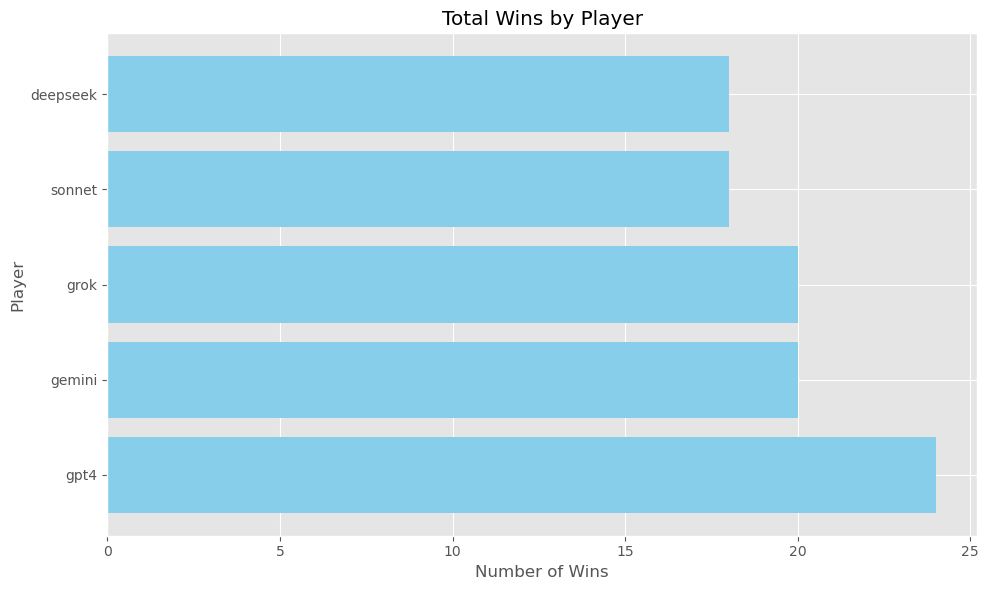

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# df = pd.read_csv('results.csv')

# Count wins for each player
player_wins = df[df['is_winner'] == True]['name'].value_counts()

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create bar chart using plt.bar
plt.barh(player_wins.index, player_wins.values, color='skyblue')

# Add labels and title
plt.title('Total Wins by Player')
plt.xlabel('Number of Wins')
plt.ylabel('Player')

# Ensure tight layout
plt.tight_layout()

# plt.savefig('player_wins.png')

# Display the plot
plt.show()

In [57]:
df[df['role'] == 'Werewolf']['name'].value_counts()

name
grok        8
gemini      8
sonnet      8
deepseek    8
gpt4        8
Name: count, dtype: int64

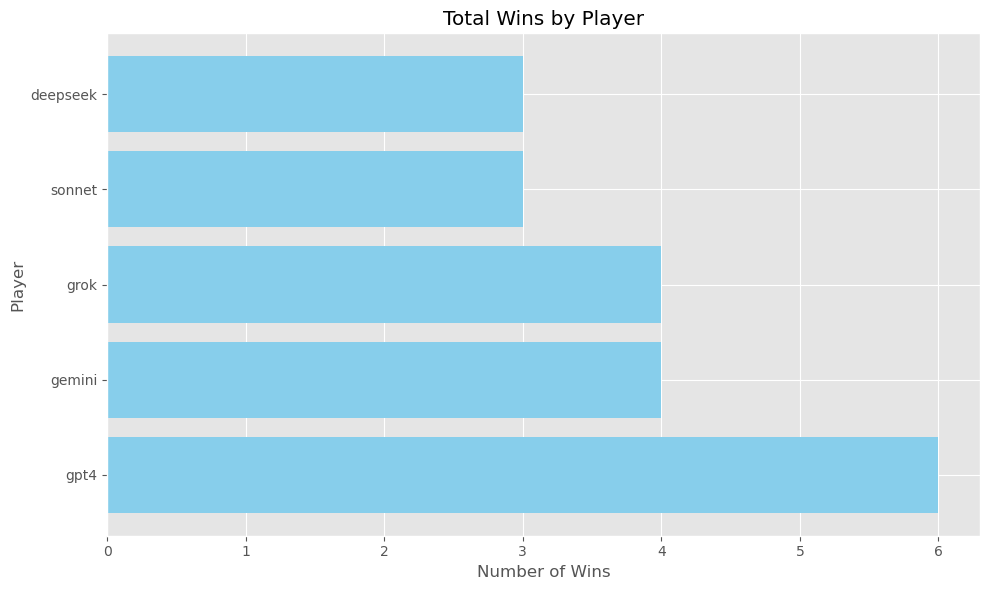

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('results.csv')

# Count wins for each player
player_wins = df[(df['is_winner'] == True) & (df['role'] == 'Werewolf')]['name'].value_counts()

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create bar chart using plt.bar
plt.barh(player_wins.index, player_wins.values, color='skyblue')

# Add labels and title
plt.title('Total Wins by Player')
plt.xlabel('Number of Wins')
plt.ylabel('Player')

# Ensure tight layout
plt.tight_layout()

# plt.savefig('player_wins.png')

# Display the plot
plt.show()

In [74]:
from scipy.stats import binomtest

wins = 24
games_played = 40
expected_win_rate = (8*(1/5)+32*(4/5))/40

result = binomtest(wins, games_played, p=expected_win_rate, alternative='greater')
print(result.pvalue)

0.8934620507720609


In [80]:
from scipy.stats import binomtest

wins = 20
games_played = 40
expected_win_rate = 1/5

result = binomtest(wins, games_played, p=expected_win_rate, alternative='greater')
print(result.pvalue)

2.1691893126332967e-05
